In [1]:
# print('### OS ###')
# !cat /etc/issue.net

# print('### CPU ###')
# !cat /proc/cpuinfo

# print('### MEM ###')
# !cat /proc/meminfo

# print('### DISK ###')
# !df -h

# print('### GPU ###')
# !nvidia-smi

In [2]:
import tensorflow as tf
print(tf.__version__)

import torch
import torchvision
import torchtext
print(torch.__version__)

2.4.1
1.7.1+cu101


In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

# argmax는 제일 큰 값이 여러개 일때 무조건 인덱스가 빠른 것을 return하므로, 
# 랜덤하게 return 하는 함수 만든다.
def rargmax(vector):
  m = np.amax(vector)
  indices = np.nonzero(vector == m)[0]
  return pr.choice(indices)

# 환경 설정. 미끄러지지 않고, 맵을 4 * 4로 한다.
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)

env = gym.make("FrozenLake-v3")

# 상태를 출력한다
env.render() 


SFFF
FHFH
FFFH
HFFG


success rate: 0.876
Final Q-table values
left down right up
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


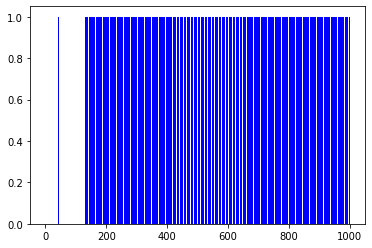

In [5]:

# 상태와 액션의 쌍으로 된 공간을 만들고 0으로 초기화 = Q 함수를 0으로 초기화한다
Q = np.zeros([env.observation_space.n, env.action_space.n]) 
# 게임 수행하며 학습할 횟수
num_episodes = 1000 

rList = [] # 게임 결과 저장. (reward의 총합)
for i in range(num_episodes):
  # 새 게임이므로 상태 초기화한다.
  # Q함수를 초기화하지 않는 것에 주목
  state = env.reset()
  rAll = 0
  done = False

  # 게임 종료될 때까지 (goal을 찾을 때까지) 반복한다.
  while not done:
    # Q 함수에게 물어봐서 현재 상태에서 어떤 행동을 할지 결정한다.
    action = rargmax(Q[state, :])

    # 결정한 행동을 취한 결과에 대한 상태와 보상 등의 정보를 가져온다.
    new_state, reward, done, _ = env.step(action)

    # 상태와 행동 쌍의 공간에 결과를 기록한다 = Q함수를 갱신한다.
    Q[state, action] = reward + np.max(Q[new_state, :])

    # goal 까지 가는 동안의 reward를 모두 더한다. (이 예제의 경우 찾으면 1 아니면 0이된다.)
    rAll += reward
    state = new_state
  
  rList.append(rAll)

print('success rate: ' + str(sum(rList)/num_episodes))
print('Final Q-table values')
print('left down right up')
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()